# Exploratory Data Analysis

This notebook performs a comprehensive analysis of the training data to understand the dataset characteristics and relationships.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
plt.style.use('seaborn')
sns.set_palette('husl')

/var/folders/p9/4mc2ckg176xdg_w93nl6t5jc0000gp/T/ipykernel_62153/498610531.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Load and Inspect Data

In [2]:
# Load data
df = pd.read_csv('../src/data/processed/training_data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nData Types:")
display(df.dtypes)

print("\nBasic Statistics:")
display(df.describe())

Dataset Shape: (800, 21)

First few rows:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,432.475954,289.373016,481.315600,358.755566,802.659004,176.761177,72.648102,720.969179,36.327684,83.768878,...,4.385848,516.789458,19.624422,13.162440,42.351948,35.920392,20.755984,13.814300,384.497136,14.364922
1,517.596250,330.448341,585.920055,22.684031,169.813240,335.601640,284.451476,748.101047,73.701438,358.147215,...,5.563334,2.960064,20.721878,17.740184,1.726915,167.576065,75.492679,2.480979,303.710869,19.984801
2,189.439350,553.888820,165.833790,202.465927,176.695586,321.155049,407.278389,161.245668,282.269025,221.570899,...,4.536947,581.823741,101.695639,0.653592,486.859084,117.491548,6.420465,20.713314,22.651537,12.944351
3,237.307878,195.894881,416.752252,468.729031,611.693517,301.411711,241.880655,49.597044,122.396821,13.828319,...,5.518968,45.014729,196.350455,47.638515,411.414213,67.142022,115.630943,8.927957,388.240433,14.792440
4,602.845256,16.103208,221.759979,345.765574,558.588369,276.704241,408.069566,19.390813,138.769765,146.662193,...,2.136214,133.590430,197.634584,26.278027,111.127557,172.181136,85.869642,30.537857,625.931837,11.802634



Data Types:


feature_0     float64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
target        float64
dtype: object


Basic Statistics:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,468.181612,301.960218,317.132996,283.213456,485.975950,320.953859,217.136330,387.196289,179.485453,196.003058,...,3.372667,479.841915,100.112096,28.334725,277.205999,91.217615,70.927129,27.385266,457.016407,14.631342
std,270.797415,170.691136,176.501920,157.698215,272.594030,185.157189,123.660691,235.131376,104.059309,111.042671,...,1.986369,276.304197,59.149794,16.105155,167.385930,53.950523,40.588905,15.509062,270.650146,5.089503
min,0.916648,0.800119,0.173025,0.308823,0.598527,0.997347,0.402436,0.474825,0.727850,0.264253,...,0.004464,1.706240,0.194306,0.222312,1.726915,0.093789,0.072986,0.101761,0.252919,0.279805
25%,239.330140,157.338244,167.516318,151.302826,250.305362,158.374610,106.876625,195.037853,94.220273,95.052359,...,1.630150,249.560260,48.132939,14.660437,131.516567,44.357970,34.903031,13.815298,221.270792,10.879914
50%,477.750620,303.257176,326.310194,294.574403,493.470486,328.722464,217.098090,364.124238,173.364771,199.587048,...,3.349497,468.536888,100.247827,27.953146,275.950814,87.484343,74.429675,27.766111,462.153497,14.687955
75%,704.650292,448.878174,474.484472,415.806162,720.747672,480.076559,327.411334,588.565017,268.790459,291.546642,...,5.024192,713.291136,149.966755,42.514155,423.110446,137.888018,105.484961,40.402938,688.352373,18.224713
max,940.771543,595.359858,614.271632,549.896216,950.017444,638.199832,426.308251,809.346792,367.084755,384.919108,...,6.859269,979.715063,203.122292,56.467485,566.611509,187.041256,138.675389,53.254740,935.740775,27.360789


## 2. Check for Missing Values

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
display(missing_values[missing_values > 0] if missing_values.any() else "No missing values found")

Missing values per column:


'No missing values found'

## 3. Target Variable Analysis

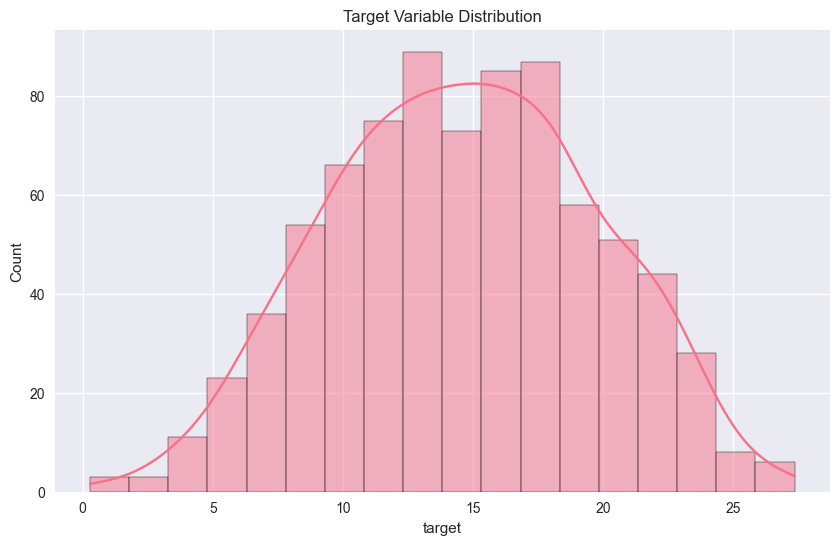

Target Statistics:


count    800.000000
mean      14.631342
std        5.089503
min        0.279805
25%       10.879914
50%       14.687955
75%       18.224713
max       27.360789
Name: target, dtype: float64

In [4]:
# Plot target distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True)
plt.title('Target Variable Distribution')
plt.show()

# Calculate target statistics
print("Target Statistics:")
display(df['target'].describe())

## 4. Feature Analysis

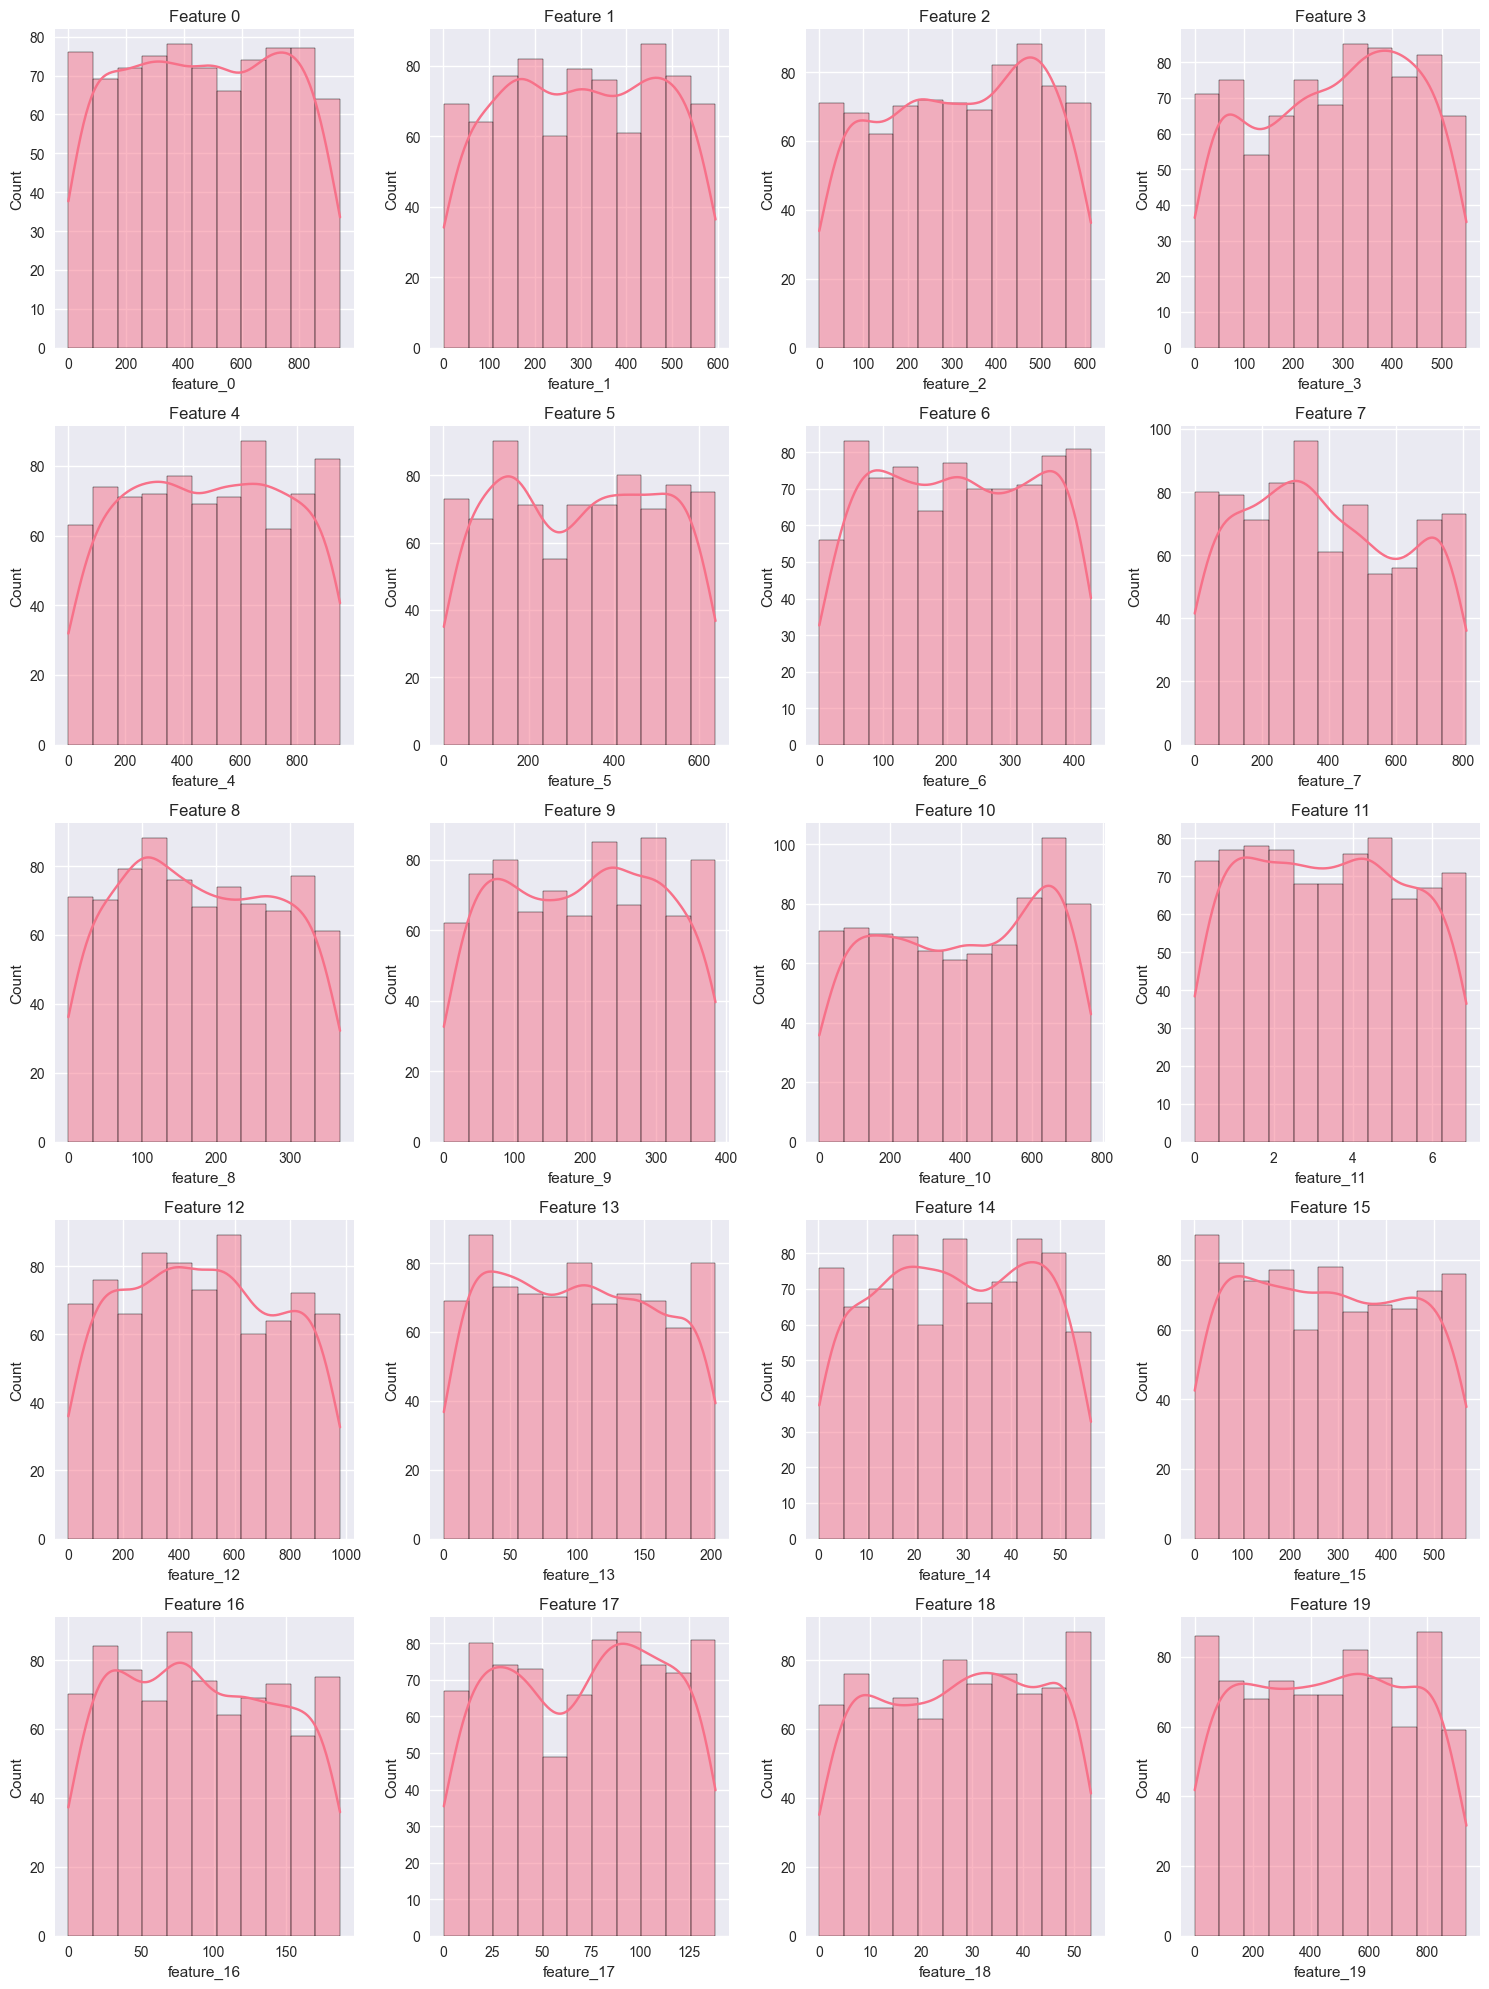

In [5]:
# Plot feature distributions
n_features = len(df.columns) - 1  # Excluding target
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4*n_rows))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Feature {i-1}')
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

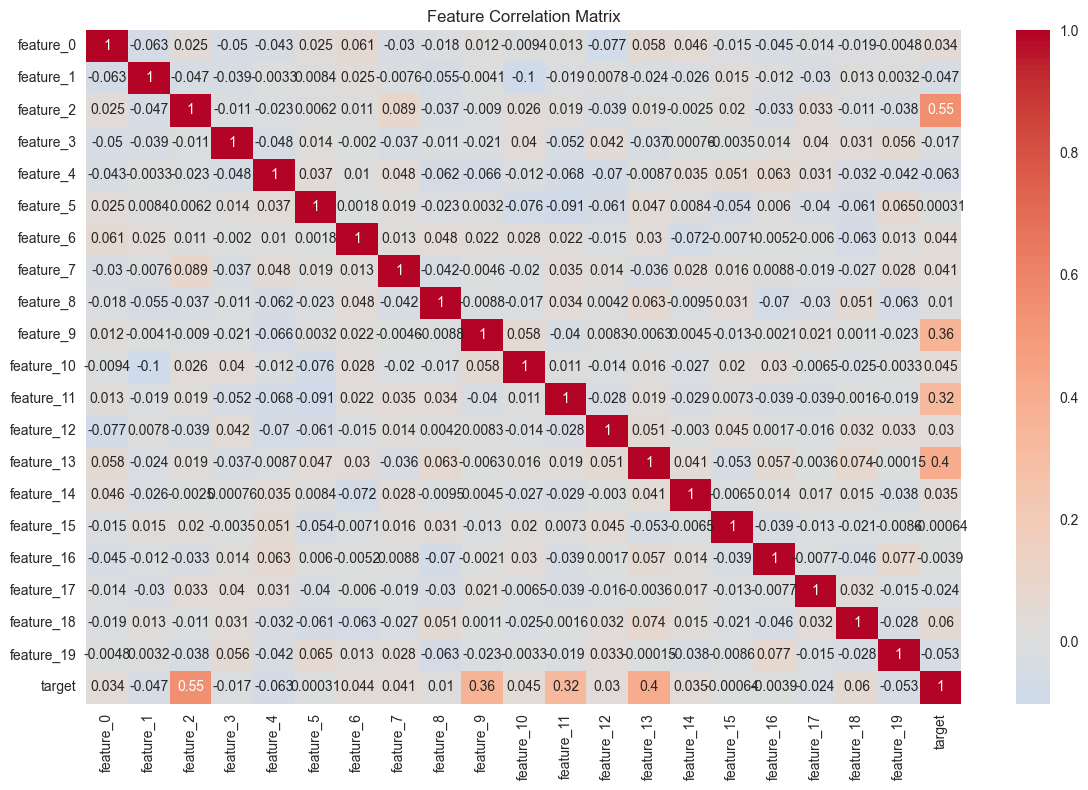

Top correlations with target:


feature_2     0.551767
feature_13    0.404697
feature_9     0.361942
feature_11    0.322802
feature_18    0.060052
Name: target, dtype: float64

In [6]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display top correlations with target
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("Top correlations with target:")
display(target_correlations[1:6])  # Skip target itself

## 6. Outlier Analysis

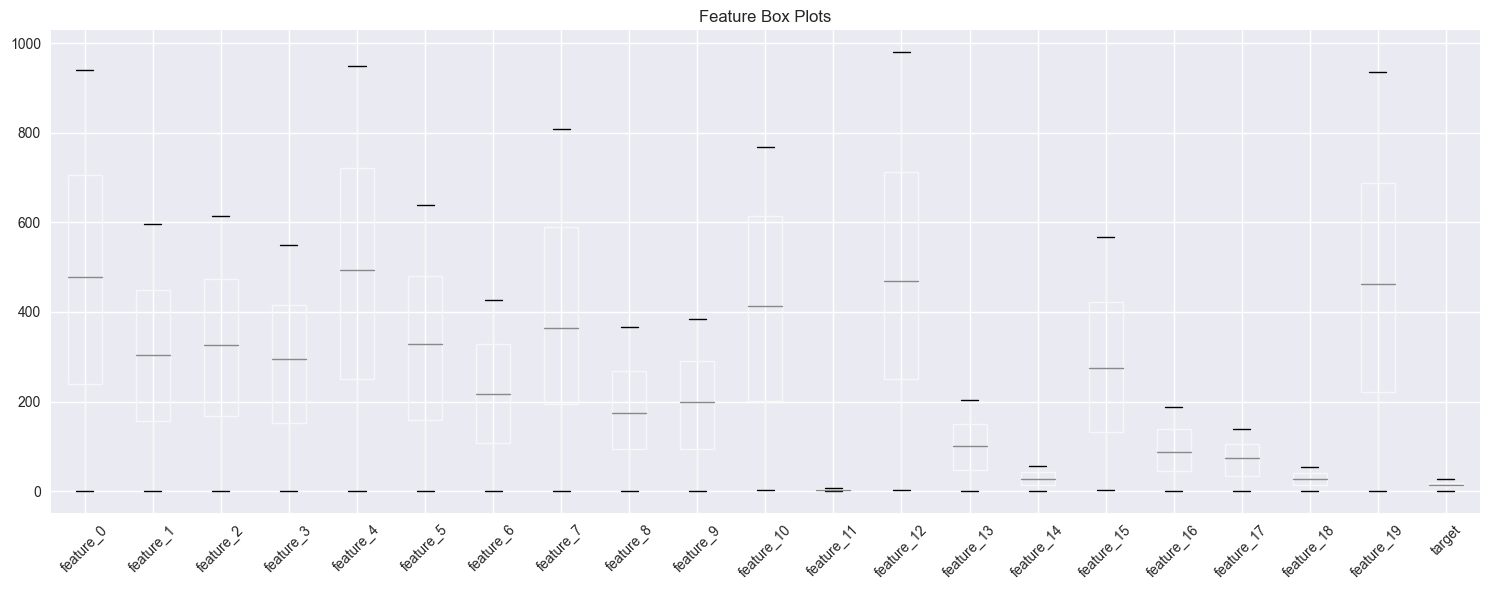

Number of outliers per column:


feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
target        0
dtype: int64

In [7]:
# Box plots for features
plt.figure(figsize=(15, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Feature Box Plots')
plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()

outliers = df.apply(count_outliers)
print("Number of outliers per column:")
display(outliers)

## 7. Feature Relationships

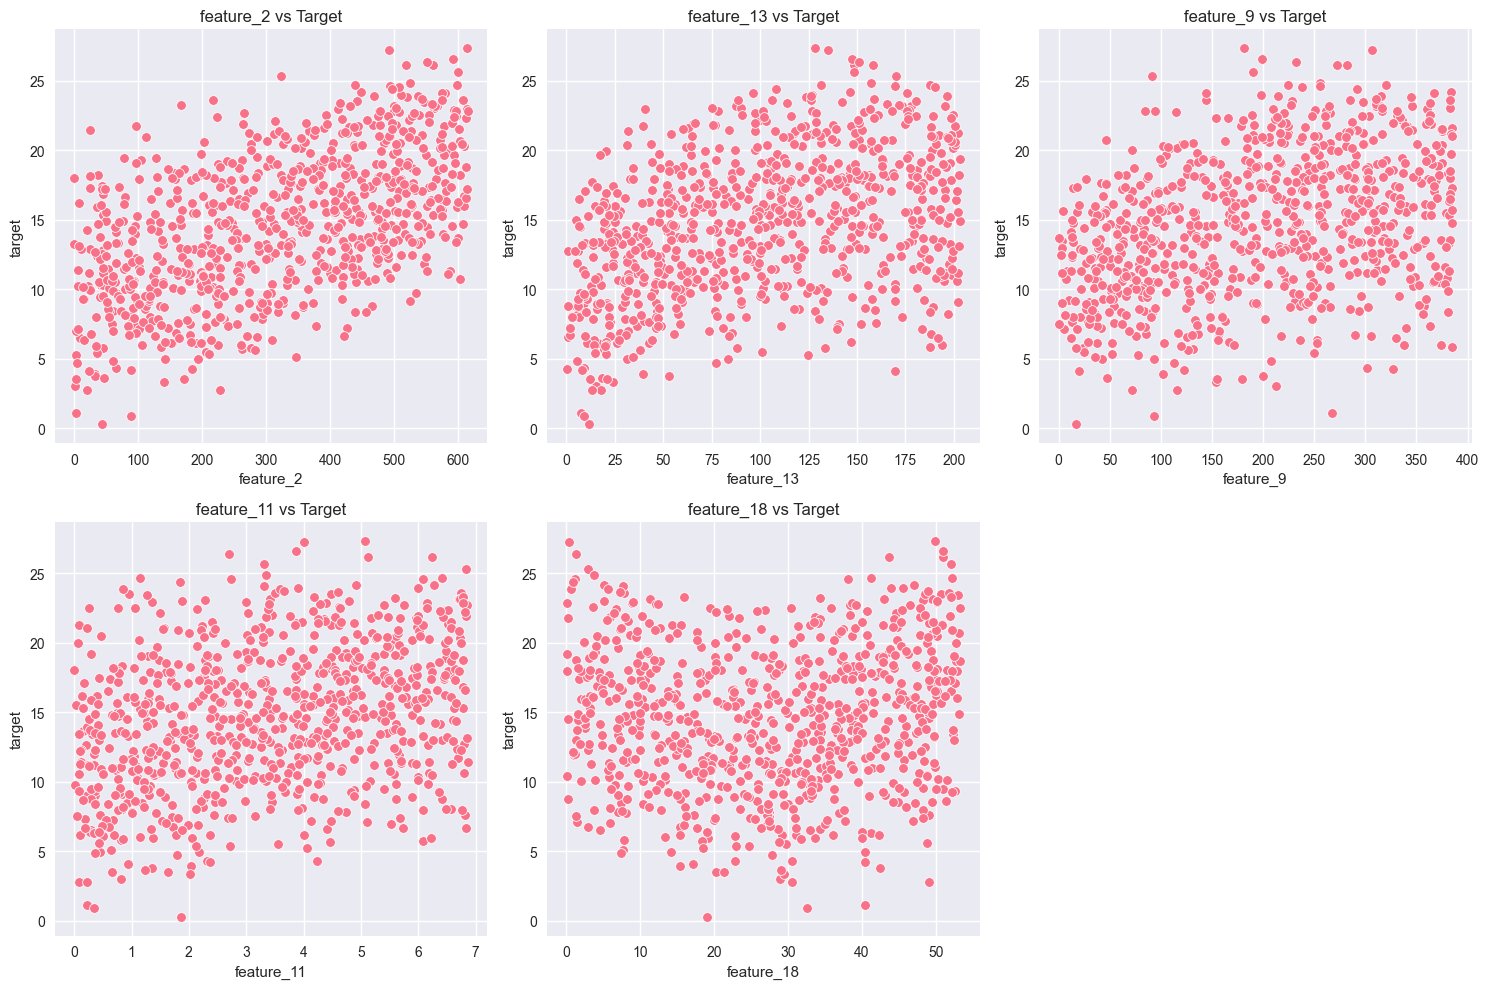

In [8]:
# Plot scatter plots for top correlated features with target
top_features = target_correlations[1:6].index
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='target')
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

## 8. Summary and Insights

Based on the analysis above, we can draw the following insights:

1. Feature Correlation
- Most features are weakly correlated with each other, indicating low multicollinearity.
- The target variable shows moderate positive correlations with a few features, notably feature_2, feature_9, feature_11, and feature_13. These are likely to be the most predictive features.
2. Descriptive Statistics
- All features and the target have 800 observations, with no missing values.
- Features are on very different scales, with some (e.g., feature_0, feature_4, feature_12, feature_19) having much higher means and ranges than others (e.g., feature_11, feature_13, feature_14).
- The target variable has a mean of ~14.63, a standard deviation of ~5.09, and is symmetrically distributed.
3. Target Variable Distribution
- The target variable is approximately normally distributed, with no significant skewness or outliers.
- This is ideal for regression modeling, as many algorithms assume or benefit from a normally distributed target.
4. Feature Box Plots
- There is substantial variability in feature scales and spreads.
- Several features show the presence of outliers.
- Some features have very low variance and may be less informative for modeling.
5. Feature vs. Target Relationships
- feature_2 and feature_13 show clear positive relationships with the target, making them strong candidates for predictive modeling.
- feature_9 has a weaker but still positive relationship.
- feature_11 and feature_18 show little to no relationship with the target and may be less useful.
